# Task: Review the most common types of violations from the fall project.

- Subtask: Based on available data, what are some factors that affect violation frequency/type?

## Team 1 (Property Violation & Bad Landlords) 
- Team 1's project is the most related to the task we are trying to answer  
- Link:
https://drive.google.com/file/d/1HmgFhz5-zT2ej4yCVz1cv4zBk3q8WPwo/view


Number of violations per year peaked at 2015:
![VIOLATIONS](2022_team1_violations_per_year.png)

Most common type of violation appears to be housing complaint, followed by sanitation requests:
![TYPE OF VIOLATIONS](2022_team1_types_of_violations.png)

Violations seem to concentrate in Dorchester, but also heavily impacts Boston:  
![VIOLATION PER REGION](2022_team1_violations_by_region.png)

### Factors affecting violations...
Team 1 found that lesser population and greater violations are correlated:  
(this is the matrix they used to show, but honestly, it doesn't make sense, needs more explaination)  
![VIOLATION POPULATION CORRELATION](2022_team1_violations_population_correlation.png)

Their matrix for income and number of violations doesn't make sense either:  
![VIOLATION INCOME CORRELATION](2022_team1_violations_income_correlation.png)

They seem to find higher correlation for grad students vs undergrade (maybe education is related?):  
![](2022_team1_violations_education_correlation.png)

In Allston and Mission Hill, violation is positively related to house price:  
![](2022_team1_violations_houseprice_correlation.png)



# Personal Research On 'Building and Property Violations Dataset'  
- link: https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c

In [66]:
import pandas as pd

df = pd.read_csv("BUILDING_AND_PROPERTY_VIOLATIONS.csv")
df.head()


,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,violation_city,violation_state,violation_zip,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.482 A,NaN,"Smoke Detectors & Carbon Monoxide Alarms - Owner shall provide, install and maintain in operable condition smoke detectors and carbon monoxide alarms",116,NaN,Hutchings,ST,Dorchester,MA,02121,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.31161,-71.09234,"(42.31161000001751, -71.09234000120948)"
1,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.500,NaN,"Owners Responsibility to Maintain Structural Elements - Structural elements shall be maintained free from holes, cracks, loose plaster, or other defects.",116,NaN,Hutchings,ST,Dorchester,MA,02121,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.31161,-71.09234,"(42.31161000001751, -71.09234000120948)"
2,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.482 A,NaN,"Smoke Detectors & Carbon Monoxide Alarms - Owner shall provide, install and maintain in operable condition smoke detectors and carbon monoxide alarms",116,NaN,Hutchings,ST,Dorchester,MA,02121,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.31161,-71.09234,"(42.31161000001751, -71.09234000120948)"
3,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.482 A,NaN,"Smoke Detectors & Carbon Monoxide Alarms - Owner shall provide, install and maintain in operable condition smoke detectors and carbon monoxide alarms",116,NaN,Hutchings,ST,Dorchester,MA,02121,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.31161,-71.09234,"(42.31161000001751, -71.09234000120948)"
4,HVIOL-662883,2023-02-22 16:34:56,Open,CMR410.500,NaN,"Owners Responsibility to Maintain Structural Elements - Structural elements shall be maintained free from holes, cracks, loose plaster, or other defects.",116,NaN,Hutchings,ST,Dorchester,MA,02121,12,116 Hutchings St #1,NaN,Dorchester,MA,02121,256986,42.31161,-71.09234,"(42.31161000001751, -71.09234000120948)"


In [67]:
complaints = df[["description", "case_no"]]
complaints = complaints.dropna()
group = complaints.groupby("description")["case_no"].count().reset_index()
group = group.rename(columns={"case_no":"case_count"})
group = group.sort_values(by=["case_count"], ascending=False)
pd.set_option('display.max_colwidth', None)  
group.head(20)


,description,case_count
160,Failure to Obtain Permit,3431
462,Unsafe and Dangerous,3385
328,"Owners Responsibility to Maintain Structural Elements - Structural elements shall be maintained free from holes, cracks, loose plaster, or other defects.",2472
327,"Owners Installation/Maintenance Responsibility - All facilities and equipment which are required by owner including but not limited to water, gas, electrical and heating, shall be installed in accordance with all accepted codes.",1379
261,Maintenance,1123
154,"Extermination of Insects, Rodents and Skunks - The owner of a dwelling containing two or more dwelling units shall maintain it and its premises free from all rodents, cockroaches and insect infestation and shall be responsible for exterminating them",935
415,"Smoke Detectors & Carbon Monoxide Alarms - Owner shall provide, install and maintain in operable condition smoke detectors and carbon monoxide alarms",794
152,"Extermination of Insects, Rodents and Skunks - Extermination shall be accomplished by eliminating the harborage places of insects and rodents. All use of pesticides shall be in accordance with applicable laws and regulations of the Department of Food and Agricultures Pesticide Board.",787
155,"Extermination of Insects, Rodents and Skunks - The owner of a rooming house shall maintain it and its premises free from all rodent, cockroaches, and insect infestation and shall be responsible for exterminating them",726
442,Testing & Certification,701


<AxesSubplot: xlabel='violation_city'>

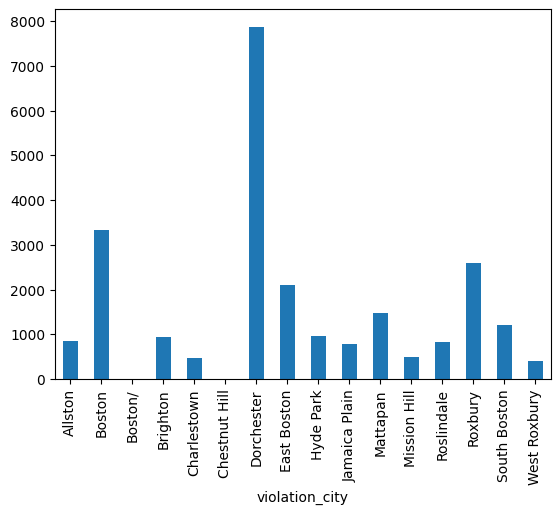

In [74]:
df = pd.read_csv("BUILDING_AND_PROPERTY_VIOLATIONS.csv")
df.head()
cities = df[["violation_city", "case_no"]]
cities = cities.dropna()
cities.groupby("violation_city")["case_no"].count().plot(kind="bar")



In [75]:
group = cities.groupby("violation_city")["case_no"].count().reset_index()
group = group.rename(columns={"case_no":"case_count"})
group = group.sort_values(by=["case_count"], ascending=False)
pd.set_option('display.max_colwidth', None)  
group.head(20)

,violation_city,case_count
6,Dorchester,7871
1,Boston,3326
13,Roxbury,2588
7,East Boston,2102
10,Mattapan,1475
14,South Boston,1212
8,Hyde Park,974
3,Brighton,932
0,Allston,859
12,Roslindale,831
